<a href="https://colab.research.google.com/github/PaolaMaribel18/hands-on-2023A/blob/master/notebooks/07_linearRegression_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7 Linear Regression with TensorFlow using the California Housing Dataset
The goal of this exercise is to implement a linear regression model using TensorFlow to predict **house prices** based on the California Housing Dataset. The dataset contains various features such as average income, housing average age, and more. Your task is to build a linear regression model and evaluate its performance.

##Import the required libraries:



In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

##Load the California Housing Dataset



In [2]:
raw = fetch_california_housing()
X = pd.DataFrame(data=raw['data'], columns=raw['feature_names'])
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
y = pd.Series(raw['target'])
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

##Preprocess the data:



*   Normalize the features using the mean and standard deviation.

In [4]:
# Normalize the features using the mean and standard deviation
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [5]:
X_normalized

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

* Split the dataset into training and testing sets (e.g., 80% for training, 20% for testing).


In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [7]:

X_train.shape, X_test.shape

((16512, 8), (4128, 8))

##Define the TensorFlow graph:



* Create placeholders for the input features (X) and target variable (y).


In [8]:
nf=X_train.shape[1]
X_placeholder = tf.placeholder(shape=(None, nf), dtype=tf.float32)
y_placeholder = tf.placeholder(shape=(None), dtype=tf.float32)

* Create variables for the model's weights (W) and bias (b).


In [9]:
W = tf.Variable(tf.random_normal(shape=(nf, 1)), name='weights')
b = tf.Variable(tf.zeros(shape=(1,)), name='bias')

* Define the linear regression model using the equation: y_pred = X * W + b.


In [10]:
y_pred = tf.matmul(X_placeholder, W) + b


* Define the loss function as the mean squared error between the predicted values and the true values.


In [11]:
loss = tf.reduce_mean(tf.square(y_pred - y_placeholder))


* Choose an optimizer (e.g., Gradient Descent) to minimize the loss function.


In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss)

## Train the model


* Initialize TensorFlow session.
* Initialize the model's variables.
* Set the number of training epochs and the learning rate.
* For each epoch, iterate through the training dataset and update the model's parameters using the optimizer.
* Print the training loss at regular intervals.

In [14]:
#Initialize the model's variables.
num_epochs = 100
batch_size = 32
train_loss_history = []
val_loss_history = []

#Initialize TensorFlow session.
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            #For each epoch, iterate through the training dataset and update the model's parameters using the optimizer.
            sess.run(train_op, feed_dict={X_placeholder: X_batch, y_placeholder: y_batch})

        train_loss = sess.run(loss, feed_dict={X_placeholder: X_train, y_placeholder: y_train})
        val_loss = sess.run(loss, feed_dict={X_placeholder: X_test, y_placeholder: y_test})
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)
        #Print the training loss at regular intervals.
        if epoch % 1.5 == 0:
            print(f'Epoch {epoch}: Training Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}')

    y_pred_test = sess.run(y_pred, feed_dict={X_placeholder: X_test})


Epoch 0: Training Loss = 2.4940, Validation Loss = 2.4636
Epoch 3: Training Loss = 1.4517, Validation Loss = 1.4538
Epoch 6: Training Loss = 1.4034, Validation Loss = 1.3969
Epoch 9: Training Loss = 1.3771, Validation Loss = 1.3630
Epoch 12: Training Loss = 1.3612, Validation Loss = 1.3422
Epoch 15: Training Loss = 1.3515, Validation Loss = 1.3295
Epoch 18: Training Loss = 1.3456, Validation Loss = 1.3219
Epoch 21: Training Loss = 1.3421, Validation Loss = 1.3174
Epoch 24: Training Loss = 1.3401, Validation Loss = 1.3147
Epoch 27: Training Loss = 1.3388, Validation Loss = 1.3131
Epoch 30: Training Loss = 1.3382, Validation Loss = 1.3122
Epoch 33: Training Loss = 1.3378, Validation Loss = 1.3117
Epoch 36: Training Loss = 1.3376, Validation Loss = 1.3115
Epoch 39: Training Loss = 1.3375, Validation Loss = 1.3113
Epoch 42: Training Loss = 1.3375, Validation Loss = 1.3113
Epoch 45: Training Loss = 1.3375, Validation Loss = 1.3113
Epoch 48: Training Loss = 1.3375, Validation Loss = 1.3113
E

##Evaluate the model:



* Calculate the mean squared error (MSE) between the predicted and true values.


In [15]:
# Evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_test)

* Print the MSE as a measure of the model's performance.


In [16]:

print(f'Mean Squared Error (MSE): {mse:.4f}')

Mean Squared Error (MSE): 1.2606


* Use the trained model to make predictions on the test dataset.


In [17]:
from tabulate import tabulate
# Reshape the arrays to be 1-dimensional
y_test = y_test.values.flatten()
y_pred_test = y_pred_test.flatten()

# Print the true labels and predicted labels in a table
results_table = pd.DataFrame({'True Label': y_test[:10], 'Predicted Label': y_pred_test[:10]})
print(tabulate(results_table, headers='keys'))

      True Label    Predicted Label
--  ------------  -----------------
 0       0.477              2.02817
 1       0.458              2.06041
 2       5.00001            2.08908
 3       2.186              2.09709
 4       2.78               2.08453
 5       1.587              2.07223
 6       1.982              2.08719
 7       1.575              2.07238
 8       3.4                2.1033
 9       4.466              2.12627


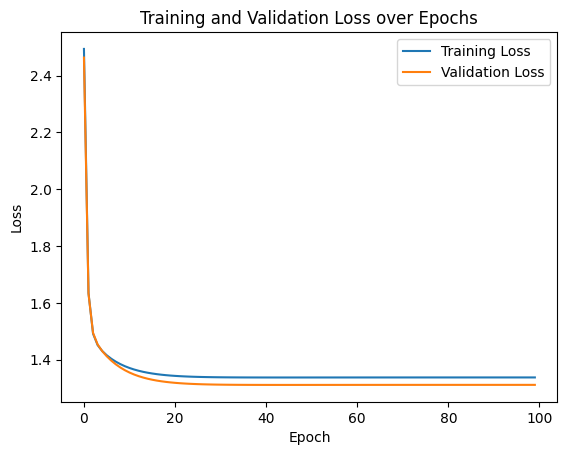

In [20]:
# Plot the training loss
import matplotlib.pyplot as plt

epochs = range(0, num_epochs, 1)
plt.plot(epochs, train_loss_history, label='Training Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()